### 用Julia求解常微分方程
我们将尝试用数值方法求解常微分方程初值问题

\begin{equation}
u^{\prime}=f(u, p, t), \quad u\left(t_{0}\right)=u_{0}
\end{equation}
其中$u(t)\in \mathbb{R}^n$

例子：
求解洛伦兹系统

\begin{equation}
\begin{aligned}
&\frac{\mathrm{d} x}{\mathrm{~d} t}=\sigma(y-x), \\
&\frac{\mathrm{d} y}{\mathrm{~d} t}=x(\rho-z)-y, \\
&\frac{\mathrm{d} z}{\mathrm{~d} t}=x y-\beta z .
\end{aligned}
\end{equation}

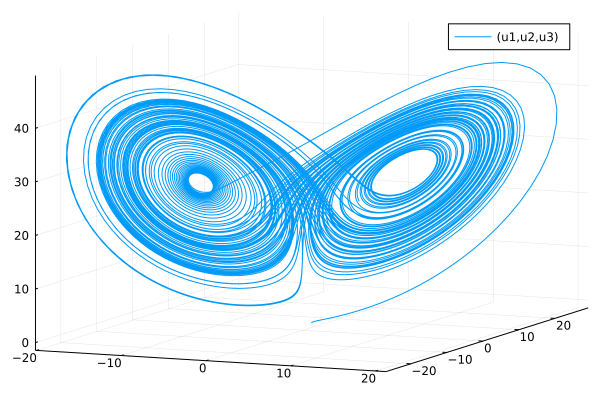

In [1]:
using OrdinaryDiffEq, Plots

function lorenz!(du,u,p,t) #du:增量，u:要求解的变量，p:微分方程参数，t常微分方程自变量
 du[1] = p[1]*(u[2]-u[1])
 du[2] = u[1]*(p[2]-u[3]) - u[2]
 du[3] = u[1]*u[2] - p[3]*u[3]
end

u0 = [1.0;0.0;0.0] #微分方程初始值
p = [10.0; 28.0; 8/3]
tspan = (0.0,100.0) #定义求解区间
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob, Tsit5()) #利用Tsit5算法求解
plot(sol, vars=(1,2,3))

如果我所感兴趣的只是某几个时间点系统演化的结果，如何获得呢？🤔

In [2]:
sol = solve(prob, Tsit5(), saveat=[0.5;1.4;86])

retcode: Success
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
  0.5
  1.4
 86.0
u: 3-element Vector{Vector{Float64}}:
 [6.503654873055267, -8.508354692189316, 38.09199727438672]
 [-8.09030069397038, -9.010437949122997, 25.215902325257098]
 [11.177046304615162, 16.88005771660424, 22.344539604289423]

In [3]:
sol = solve(prob, Tsit5(), saveat=10)

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
   0.0
  10.0
  20.0
  30.0
  40.0
  50.0
  60.0
  70.0
  80.0
  90.0
 100.0
u: 11-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [-5.694805425086553, -5.433239285337524, 24.12821689979091]
 [3.714450854292782, 5.132210086886558, 17.85685510819146]
 [-10.005166958415188, -16.987070162062025, 17.252909692925407]
 [14.241403459268776, 11.667132861372258, 37.164613348156074]
 [-8.189770753756465, -1.4496668808372626, 33.717464169145615]
 [-4.748548584091321, -1.248774545183102, 27.6828530997232]
 [-2.9698672166843947, 3.0881363769450725, 29.419364809996125]
 [-4.687127869101443, -9.591260790652894, 5.023853412834433]
 [14.648149758270183, 9.372227060995922, 39.99227160651403]
 [4.596259899368738, 4.819051128437629, 22.02318896633189]

`saveat` 选项是用已经求解出来的解在自己想要的点上做插值得到最终的结果，并不是我们真正求解出来的值。如果系统有一定不连续性，或因为其他原因我们不能单纯用插值的方法得到目标点的值应该怎么办？
这时候我们应该用`tstops`的选项，它将在接近我们求解目标点的时候减小步长，直到正好走到目标点停止

In [4]:
data_points=[0.5, 1.4, 86]
solve(prob, Tsit5(), tstops=data_points, saveat=data_points)

retcode: Success
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
  0.5
  1.4
 86.0
u: 3-element Vector{Vector{Float64}}:
 [6.50351227035391, -8.50942462444389, 38.092125697189815]
 [-8.090012737508614, -9.00979210709885, 25.21804139268569]
 [-10.571205623779308, -17.01031784039016, 19.73759678453902]

如果我想要非常高精度的解，或者我不在意解的精度，只想快点得到我最终结果的图怎么办？(给求解器设置abstol和reltol)

通常默认的值: abstol=1e-6, reltol=1e-3
\begin{equation}
e r r_{\text {scaled }}=e r r /(\text { abstol }+\max (uprev, u) * \text { reltol })
\end{equation}
求解器会保证每步的$e r r_{\text {scaled }}$小于1

In [5]:
sol = solve(prob, Tsit5(), reltol=1e-2, abstol=1e-3)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 736-element Vector{Float64}:
   0.0
   0.003245043331190651
   0.014967360161191165
   0.034456148870799765
   0.05940309054873111
   0.09254013427865536
   0.1352582549944366
   0.18921175506653637
   0.2475514765352602
   0.31292495963864764
   0.3815499319015849
   0.44986194504343435
   0.5038319821262642
   ⋮
  98.51142072183832
  98.6570273438387
  98.79531454028069
  98.94122475108816
  99.0556641164206
  99.18688751064758
  99.33249414352903
  99.47078135900313
  99.61669157969591
  99.73113092900422
  99.86235433475245
 100.0
u: 736-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9695119529537286, 0.08930082052036892, 0.00014230124264189925]
 [0.8893955387669636, 0.3902972169532134, 0.0027110998681957915]
 [0.8432070438407453, 0.8463610432995043, 0.012694172713470172]
 [0.9095480015093925, 1.422409928630138, 0.03568142448264043]
 [1.1815908544218279, 2.31331519464412, 0.09396930258430103]
 [1.8

更多可以选择的调整和控制可见：https://diffeq.sciml.ai/latest/basics/common_solver_opts/

通常我们在求解常微分方程的时候，我们会将系统化成一阶常微分方程系统（即等式左边为t的一阶导数），
如果我们不想手动化简它，或者微分方程系统比较大，将方程化为一阶系统会耗费大量精力怎么办😰？
\begin{equation}
\begin{aligned}
&\frac{\mathrm{d^2} x}{\mathrm{~d} t^2}=\sigma(y-x), \\
&\frac{\mathrm{d} y}{\mathrm{~d} t}=x(\rho-z)-y, \\
&\frac{\mathrm{d} z}{\mathrm{~d} t}=x y-\beta z .
\end{aligned}
\end{equation}

使用ModelingToolkit

ref:https://mtk.sciml.ai/stable/tutorials/higher_order/

In [6]:
using ModelingToolkit, OrdinaryDiffEq

@parameters σ ρ β
@variables t x(t) y(t) z(t)
D = Differential(t)

eqs = [D(D(x)) ~ σ*(y-x),
       D(y) ~ x*(ρ-z)-y,
       D(z) ~ x*y - β*z]

@named sys = ODESystem(eqs)

Model sys with 3 equations
States (3):
  x(t)
  y(t)
  z(t)
Parameters (3):
  σ
  ρ
  β

将这个微分方程系统变为低阶系统：

In [7]:
sys = ode_order_lowering(sys)

Model sys with 4 equations
States (4):
  xˍt(t)
  y(t)
  z(t)
  x(t)
Parameters (3):
  σ
  ρ
  β

length(sol) = 1495


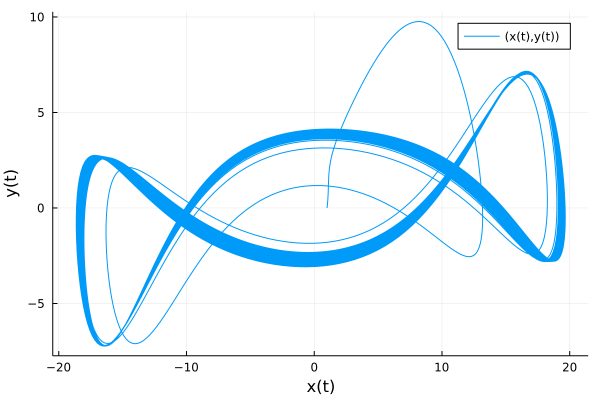

In [8]:
u0 = [D(x) => 2.0,
      x => 1.0,
      y => 0.0,
      z => 0.0]

p  = [σ => 28.0,
      ρ => 10.0,
      β => 8/3]

tspan = (0.0,100.0)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())
@show length(sol)
plot(sol,vars=(x,y))

In [9]:
#out-of-place version
using BenchmarkTools
function lorenz(u,p,t)
 dx = 10.0*(u[2]-u[1])
 dy = u[1]*(28.0-u[3]) - u[2]
 dz = u[1]*u[2] - (8/3)*u[3]
 [dx,dy,dz]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 653 samples with 1 evaluation.
 Range (min … max):  4.712 ms … 47.749 ms  ┊ GC (min … max):  0.00% … 75.36%
 Time  (median):     5.965 ms              ┊ GC (median):     0.00%
 Time  (mean ± σ):   7.636 ms ±  5.093 ms  ┊ GC (mean ± σ):  20.96% ± 21.54%

   ▃██▇▇▄▁                                                    
  ████████▇▁▅▄▁▄▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▄▁▄▄▅▇▅▆▇▇██▆▅█ ▇
  4.71 ms      Histogram: log(frequency) by time     23.5 ms <

 Memory estimate: 10.81 MiB, allocs estimate: 100152.

In [10]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 694 samples with 1 evaluation.
 Range (min … max):  4.644 ms … 31.237 ms  ┊ GC (min … max):  0.00% … 62.67%
 Time  (median):     5.634 ms              ┊ GC (median):     0.00%
 Time  (mean ± σ):   7.185 ms ±  4.954 ms  ┊ GC (mean ± σ):  20.54% ± 20.96%

  ▅█▇▇▅▃▁                                                     
  ████████▇▆▁▅▁▄▁▁▄▄▁▅▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▆▆▆███▅▄▆▆▅▅▄▅ ▇
  4.64 ms      Histogram: log(frequency) by time     25.3 ms <

 Memory estimate: 9.47 MiB, allocs estimate: 88645.

In [11]:
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 4345 samples with 1 evaluation.
 Range (min … max):  717.768 μs … 18.593 ms  ┊ GC (min … max):  0.00% … 94.78%
 Time  (median):     922.195 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.141 ms ±  1.673 ms  ┊ GC (mean ± σ):  16.12% ± 10.32%

  █▆▂                                                          ▁
  ████▆▆▅▁▃▃▁▄▄▃▁▁▃▁▁▃▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▃▁▁▁▄▄▄ █
  718 μs        Histogram: log(frequency) by time      15.4 ms <

 Memory estimate: 1.37 MiB, allocs estimate: 11746.

In [12]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  262.775 μs …  2.352 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     336.892 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   345.409 μs ± 48.758 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

            ▃ █▄▅▅▃▄ ▃▂                                         
  ▂▁▁▁▁▁▁▁▅▄█▇█████████▇▆▄▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  263 μs          Histogram: frequency by time          537 μs <

 Memory estimate: 5.61 KiB, allocs estimate: 41.

In [13]:
using StaticArrays
function lorenz_static(u,p,t)
 dx = 10.0*(u[2]-u[1])
 dy = u[1]*(28.0-u[3]) - u[2]
 dz = u[1]*u[2] - (8/3)*u[3]
 @SVector [dx,dy,dz]
end
u0 = @SVector [1.0,0.0,0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz_static,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  290.084 μs …  14.432 ms  ┊ GC (min … max):  0.00% … 96.59%
 Time  (median):     386.139 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   433.036 μs ± 742.717 μs  ┊ GC (mean ± σ):  10.77% ±  6.10%

               ▁ ▃▁▇▆▆█▄                                         
  ▁▂▃▆▆▅▃▂▂▆▄▅▆█▇███████▇▅▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  290 μs           Histogram: frequency by time          615 μs <

 Memory estimate: 452.25 KiB, allocs estimate: 1336.

In [14]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  182.248 μs …  1.995 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     189.662 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   206.934 μs ± 48.398 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ███▆▃▂▂▁▂▁▅▄▄▃▃▂▂▃▂▂▂▁▃▂▂▂                                   ▂
  ██████████████████████████████▇██▇▇▇▇▆▅▆▆▆▅▆▆▄▅▅▆▅▆▅▅▅▅▅▂▅▅▅ █
  182 μs        Histogram: log(frequency) by time       366 μs <

 Memory estimate: 3.70 KiB, allocs estimate: 22.

我们之前所用的Tsit5是怎样一种算法？用我们在数值分析的课堂上都学过的显式Euler，隐式Euler和四阶Runge-Kutta方法求解ODE不可以吗？为什么还要开发其他方法呢？开发阶数某些更低的其他算法意义在何呢？

当算法的阶数$q$更高时，我们在每一步求解的时候通过控制误差$\mathcal{O}(h^{q-1})$得到的可允许的步长就更长，求解起来就会更有效率，但是更高阶的算法，在计算每步的时候所需时间往往也都会更长。

求解一个常微分方程问题的时候，我们的选择还依赖于这个方程的刚性(stiffness)程度来进行选择。刚性没有一个严格的定义，一个重要的标准是系统Jacobian矩阵的特征值。对于非线性方程组，我们可以将其线性化得到
\begin{equation}
y^{\prime}(t)=J y(t) .
\end{equation}

将Jacobian矩阵对角化或变为Jordan block，可以等价于只考虑一个简单线性方程
\begin{equation}
y^{\prime}(t)=\lambda y(t), \quad y(0)=1 .  \quad\text{(Dahlquist test equation)}
\end{equation}
假设我们用固定步长的显式Euler法，我们可以得到
\begin{equation}
    y_{m+1} = y_{m} + h\lambda y_m = (1+h\lambda)^m y_0
\end{equation}

很显然，原方程的解在$t\rightarrow \infty$的时候应该为0，然而显式Euler得到的方程必须在
$|1+h\lambda|<1$的时候才成立，我们将由$|Re(1+z)|<1$在复平面得到的区域称为稳定域(stability domain)，如果我们有$\lambda=-50$，步长必须满足 $0\leq h \leq \frac{2}{50}$ 才能得到一个合理的解，步长被限制在一个非常小的区域范围内。

如果是隐式格式的话呢？我们假设使用固定步长的隐式Euler法，可以得到
\begin{aligned}
    y_{m+1} &= y_{m} + h\lambda y_{m+1}\\
    y_{m+1} &= (\frac{1}{1-h\lambda})^my_{0}
\end{aligned}
我们可以看到Implicit Euler法的稳定域是整个左复平面！Dahlquist test equation对h的选择并没有影响。因此对于刚性问题，虽然使用隐式格式求解的时候我们一般需要利用牛顿迭代求解一个非线性代数方程组，但权衡下来我们使用隐式方法的求解效率依然更高。

一般较低阶数的隐式格式稳定域较大，

ref:http://www.scholarpedia.org/article/Stiff_systems

自动检测问题的刚性:Solving Ordinary Differential Equations II (Ernst Hairer P21)

常微分方程求解器使用的算法最重要的两个家族是线性多步法和龙格库塔法。

其中Tsit5是一个非常有效率的五阶显式龙格库塔法，我们来尝试下用它来求解一个刚性问题

Tsit5 paper: https://www.sciencedirect.com/science/article/pii/S0898122111004706

In [15]:
function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁+k₃*y₂*y₃
  du[2] =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  du[3] =  k₂*y₂^2
  nothing
end
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),[0.04,3e7,1e4])
sol = solve(prob,Tsit5())

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/junpeng/.julia/packages/SciMLBase/OpCVa/src/integrator_interface.jl:331


retcode: MaxIters
Interpolation: specialized 4th order "free" interpolation
t: 999997-element Vector{Float64}:
   0.0
   0.0014148468219250373
   0.0020449182545311173
   0.0031082402716566307
   0.004077787050059496
   0.005515332443361059
   0.007190040962774541
   0.009125372578778032
   0.011053912492732977
   0.012779077276958607
   0.014024022307121159
   0.015243850666599433
   0.01653506083093412
   ⋮
 627.2190396080226
 627.2195546456298
 627.2200696831143
 627.2205847204418
 627.2210997576807
 627.221614794865
 627.2221298319947
 627.2226448690358
 627.2231599060223
 627.2236749429201
 627.2241899796951
 627.2247050163814
u: 999997-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9999434113193613, 3.283958829839966e-5, 2.374909234028646e-5]
 [0.9999182177783585, 3.5542680136344576e-5, 4.6239541505020636e-5]
 [0.999875715036629, 3.630246933484973e-5, 8.798249403609502e-5]
 [0.9998369766077329, 3.646280308115454e-5, 0.00012656058918590176]
 [0.9997795672444667, 3.646643085

如果我们用最简单的隐式Euler格式去求解

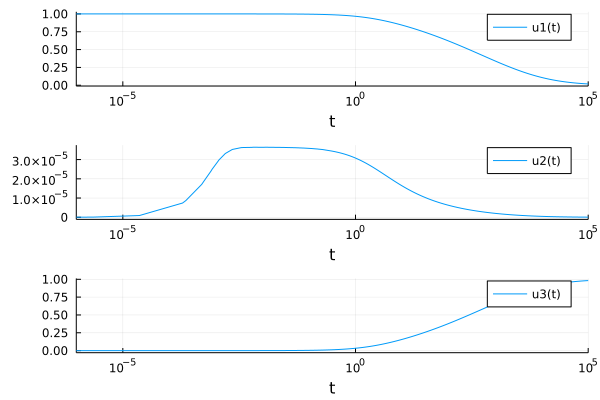

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /Users/junpeng/.julia/packages/Plots/FCM0H/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /Users/junpeng/.julia/packages/Plots/FCM0H/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /Users/junpeng/.julia/packages/Plots/FCM0H/src/utils.jl:95


In [16]:
function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁+k₃*y₂*y₃
  du[2] =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  du[3] =  k₂*y₂^2
  nothing
end
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),[0.04,3e7,1e4])
sol = solve(prob, ImplicitEuler(); dense=false)
plot(sol, xscale=:log10, tspan=(1e-6, 1e5), layout=(3,1))

OrdinaryDiffEq.jl涵盖了相当多的ODE solver，适用于不同的问题类型，对于普通的简单问题，我们可以直接使用DifferentialEquations.jl帮我们自动决定算法

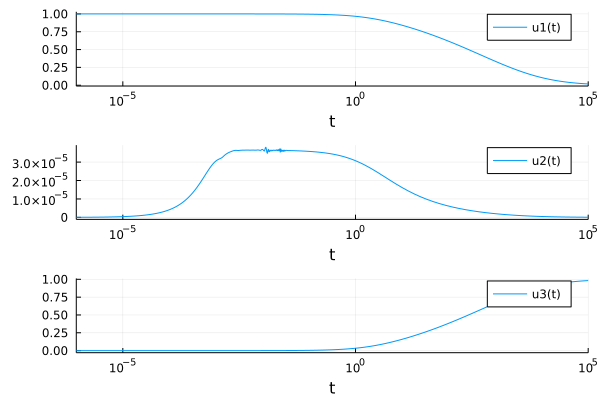

In [17]:
using DifferentialEquations
function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁+k₃*y₂*y₃
  du[2] =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  du[3] =  k₂*y₂^2
  nothing
end
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),[0.04,3e7,1e4])
sol = solve(prob)
plot(sol, xscale=:log10, tspan=(1e-6, 1e5), layout=(3,1))

In [18]:
sol.alg

CompositeAlgorithm{Tuple{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{3, false, DefaultLinSolve, Val{:forward}}}, OrdinaryDiffEq.AutoSwitchCache{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{0, false, DefaultLinSolve, Val{:forward}}, Rational{Int64}, Int64}}((Tsit5(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), Rosenbrock23{3, false, DefaultLinSolve, Val{:forward}}(DefaultLinSolve(nothing, nothing, nothing))), OrdinaryDiffEq.AutoSwitchCache{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{0, false, DefaultLinSolve, Val{:forward}}, Rational{Int64}, Int64}(61, 0, Tsit5(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), Rosenbrock23{0, false, DefaultLinSolve, Val{:forward}}(DefaultLinSolve(nothin

OrdinaryDiffEq.jl所有的solver和推荐方法可见：https://diffeq.sciml.ai/stable/solvers/ode_solve/;

https://www.zhihu.com/question/393977320/answer/1249777860

对不同问题类型的solver benchmark: https://github.com/SciML/SciMLBenchmarks.jl

对于非刚性的问题，我们通常使用Tsit5算法就已经足够，如果对解的精度有很高要求，可以考虑Vern7(9)。对于小型的刚性问题，我们可以考虑使用Rosenbrock23或Rodas类型的solver，在较为大型的ODE问题下，我们可以考虑使用基于多步法的solver(Julia原生的QNDF，TRBDF2，或调用CVODE/LSODA)，或SDIRK类型的solver（例如KenCarp4，只有对角线有系数的RK方法，可以在求解牛顿迭代的时候很有效率)。

如果我们对想求得的解有一定要求的话，比如求得的解依然满足某个守恒律或保有某种性质等等，需要一些特殊的求解算法。例如在多体运动中想守恒哈密顿量的话，需要用到sympletic integrator，求解Hyperbolic PDE离散出来的方程的时候，为了满足阶数要求和TVD等性质的时候，需要用到SSP(Strong stability preserving) RK。

一个完整可用的ODE求解器由什么部分构成？
```
initialize!(integrator)
while t < tend
    loop_header!()
    perform_step!()
    calculate_next_step_size!()
end
```
我们在perform_step!()里面计算下一步，并且做误差估计，如果$err_{scaled}$大于1，我们需要拒绝当前这一步，在calculate_next_step!()函数里面将上一步的步长减小，然后进行下一次循环。如果$err_{scaled}$小于1，我们接受当前这一步，用当前这一步的误差计算下一步的步长，并更新当前时间点t。

在其中不同类型计算步长的策略也会影响最终求解器的表现，它们和控制理论有很深的联系，主要控制步长的策略有I Control, PI Control, PID Control等等
https://diffeq.sciml.ai/stable/extras/timestepping/

一些其他有帮助的材料：

一些基础教程: https://tutorials.sciml.ai/

MIT 18.337: https://github.com/mitmath/18337

### 求解微分代数方程（DAE, differential algebraic equations)



考虑一个等价的 Robertson 系统:
\begin{equation}
\begin{aligned}
\frac{d y_{1}}{d t} &=-0.04 y_{1}+10^{4} y_{2} y_{3} \\
\frac{d y_{2}}{d t} &=0.04 y_{1}-10^{4} y_{2} y_{3}-3 * 10^{7} y_{2}^{2} \\
1 &=y_{1}+y_{2}+y_{3}
\end{aligned}
\end{equation}
可以看作
$Mu' = f(u)$，这时候Mass matrix $M$ 是singular的，我们需要传入我们mass matrix的形式

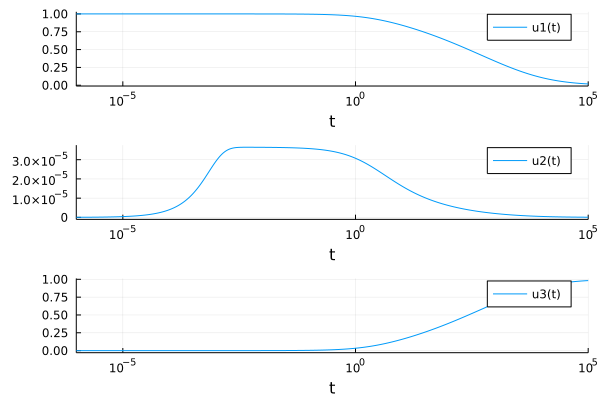

In [19]:
using DifferentialEquations
function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁ + k₃*y₂*y₃
  du[2] =  k₁*y₁ - k₃*y₂*y₃ - k₂*y₂^2
  du[3] =  y₁ + y₂ + y₃ - 1
  nothing
end
M = [1. 0  0
     0  1. 0
     0  0  0]
f = ODEFunction(rober,mass_matrix=M)
prob_mm = ODEProblem(f,[1.0,0.0,0.0],(0.0,1e5),(0.04,3e7,1e4))
sol = solve(prob_mm)
plot(sol, xscale=:log10, tspan=(1e-6, 1e5), layout=(3,1))

然而并不是所有的DAE系统都可以被这样求解，考虑一个单摆系统的方程组：
\begin{equation}
\begin{aligned}
x^{\prime} &=v_{x} \\
v_{x}^{\prime} &=T x \\
y^{\prime} &=v_{y} \\
v_{y}^{\prime} &=T y-g \\
0 &=x^{2}+y^{2}-L^{2}
\end{aligned}
\end{equation}

In [20]:
using OrdinaryDiffEq, LinearAlgebra
function pendulum!(du, u, p, t)
    x, dx, y, dy, T = u
    g, L = p
    du[1] = dx; 
    du[2] = T*x;
    du[3] = dy; 
    du[4] = T*y - g;
    du[5] = x^2 + y^2 - L^2
end
pendulum_fun! = ODEFunction(pendulum!, mass_matrix=Diagonal([1,1,1,1,0]))
u0 = [1.0, 0, 0, 0, 0]; p = [9.8, 1]; tspan = (0, 5.0)
pendulum_prob = ODEProblem(pendulum_fun!, u0, tspan, p)
solve(pendulum_prob)

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/junpeng/.julia/packages/SciMLBase/OpCVa/src/integrator_interface.jl:345


retcode: DtLessThanMin
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 4-element Vector{Float64}:
 0.0
 1.0e-6
 1.1e-5
 0.00011099999999999999
u: 4-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0, 0.0, 0.0]
 [1.0, 7.301568930584418e-14, -4.8999999999999965e-12, -9.799999999999993e-6, 7.301568930584436e-8]
 [1.0, 8.031725823642861e-13, -5.928999999999995e-10, -0.00010779999999999991, 7.301568930584416e-8]
 [0.9999999999999982, -5.86929114748419e-11, -6.037289999999988e-8, -0.0010877999999999975, -1.7947405872712285e-6]

这是因为对于Index > 1的DAE系统，我们的求解器通常是不收敛的，这里Index指的是要对原DAE系统进行多少次微分可以将其变为一个ODE系统。如果我们对原方程组的最后一个等式微分两次，并倒数第二个式子，可以得到:
\begin{equation}
\begin{aligned}
x^{\prime} &=v_{x} \\
v_{x}^{\prime} &=x T \\
y^{\prime} &=v_{y} \\
v_{y}^{\prime} &=y T-g \\
0 &=2\left(v_{x}^{2}+v_{y}^{2}+y(y T-g)+T x^{2}\right)
\end{aligned}
\end{equation}
这是一个Index-1的系统，也被叫做Index reduction，我们是否可以不去手动做这件事呢？

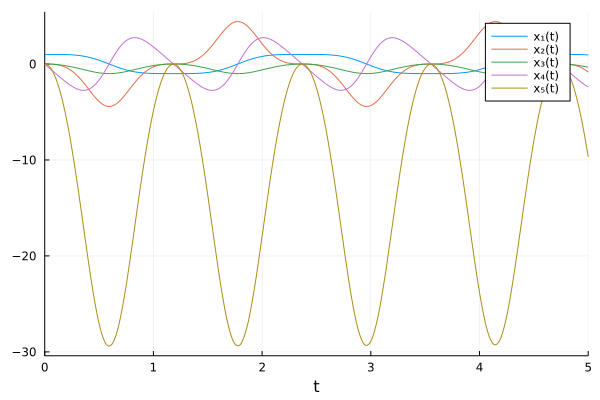

In [21]:
traced_sys = modelingtoolkitize(pendulum_prob)
pendulum_sys = structural_simplify(traced_sys)
prob = ODEProblem(pendulum_sys, [], tspan)
sol = solve(prob, Rodas4())
plot(sol, vars=states(traced_sys))

如果我们定义为ODAEProblem，我们可以将它转变成一个完全的ODE Problem，然后用显式求解器直接求解:

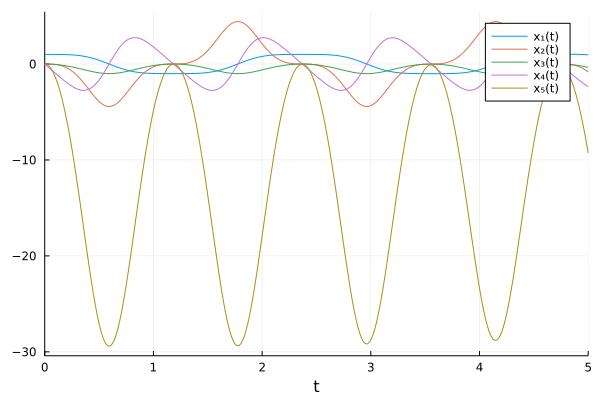

In [22]:
traced_sys = modelingtoolkitize(pendulum_prob)
pendulum_sys = structural_simplify(traced_sys)
prob = ODAEProblem(pendulum_sys, [], tspan)
sol = solve(prob, Tsit5())
plot(sol, vars=states(traced_sys))

其中modelingtoolkitize是将原问题转化成符号形式

In [23]:
modelingtoolkitize(pendulum_prob)

Model ##MTKizedODE#572 with 5 equations
States (5):
  x₁(t) [defaults to 1.0]
  x₂(t) [defaults to 0.0]
  x₃(t) [defaults to 0.0]
  x₄(t) [defaults to 0.0]
  x₅(t) [defaults to 0.0]
Parameters (2):
  α₁ [defaults to 9.8]
  α₂ [defaults to 1.0]

而
```julia
structural_simplify(traced_sys)
```
是对符号形式的系统做Index reduction

In [24]:
structural_simplify(traced_sys)

Model ##MTKizedODE#552 with 5 equations
States (5):
  x₁(t) [defaults to 1.0]
  x₂(t) [defaults to 0.0]
  x₃(t) [defaults to 0.0]
  x₄(t) [defaults to 0.0]
  x₅(t) [defaults to 0.0]
Parameters (2):
  α₁ [defaults to 9.8]
  α₂ [defaults to 1.0]
Incidence matrix:
 ×  ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅  ⋅
 ⋅  ×  ⋅  ⋅  ×  ⋅  ⋅  ⋅  ×
 ⋅  ⋅  ×  ⋅  ⋅  ⋅  ⋅  ×  ⋅
 ⋅  ⋅  ⋅  ×  ⋅  ⋅  ×  ⋅  ×
 ⋅  ⋅  ⋅  ⋅  ×  ×  ×  ×  ×

References: [ModelingToolkit: A composable graph transformation system for equation-based modeling](https://arxiv.org/pdf/2103.05244.pdf)

Documentation:
https://www.youtube.com/watch?v=HEVOgSLBzWA

更多有趣的: 

利用稀疏结构加速计算:https://diffeq.sciml.ai/stable/tutorials/advanced_ode_example/#Automatic-Sparsity-Detection
用ModelingToolkit来建模PDE系统:https://mtk.sciml.ai/stable/systems/PDESystem/

## 并行求解PDE方程

扩散方程:
\begin{equation}
\frac{\partial \phi(\mathbf{r}, t)}{\partial t}=\nabla \cdot[D(\phi, \mathbf{r}) \nabla \phi(\mathbf{r}, t)]
\end{equation}

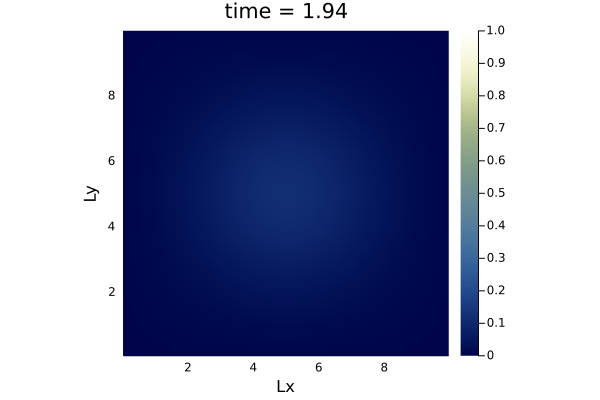

In [25]:
#The code is from https://github.com/eth-vaw-glaciology/course-101-0250-00
@views function diffusion_2D()
    # Physics
    Lx, Ly = 10.0, 10.0
    D      = 1.0
    ttot   = 2.0
    # Numerics
    nx, ny = 128, 128
    nout   = 50
    # Derived numerics
    dx, dy = Lx/nx, Ly/ny
    dt     = min(dx, dy)^2/D/4.1
    nt     = cld(ttot, dt)
    xc, yc = LinRange(dx/2, Lx-dx/2, nx), LinRange(dy/2, Ly-dy/2, ny)
    # Array initialisation
    C      =  exp.(.-(xc .- Lx/2).^2 .-(yc' .- Ly/2).^2)
    # C[2:end-1,2:end-1] .= rand(Float64, nx-2,ny-2)
    dCdt   = zeros(Float64, nx-2,ny-2)
    qx     = zeros(Float64, nx-1,ny-2)
    qy     = zeros(Float64, nx-2,ny-1)
    # Time loop
    for it = 1:nt
        qx         .= .-D.*diff(C[:,2:end-1],dims=1)./dx
        qy         .= .-D.*diff(C[2:end-1,:],dims=2)./dy
        dCdt       .= .-(diff(qx,dims=1)./dx .+ diff(qy,dims=2)./dy)
        C[2:end-1,2:end-1] .= C[2:end-1,2:end-1] .+ dt.*dCdt
        if it % nout == 0
            IJulia.clear_output(true)
            opts = (aspect_ratio=1, xlims=(xc[1], xc[end]), ylims=(yc[1], yc[end]), clims=(0.0, 1.0), c=:davos, xlabel="Lx", ylabel="Ly", title="time = $(round(it*dt, sigdigits=3))")
            display(heatmap(xc, yc, C'; opts...))
        end
    end
    return
end

diffusion_2D()

In [26]:
#The code is from https://github.com/eth-vaw-glaciology/course-101-0250-00
const USE_GPU = false
using ParallelStencil
using ParallelStencil.FiniteDifferences2D
@static if USE_GPU
    @init_parallel_stencil(CUDA, Float64, 2)
else
    @init_parallel_stencil(Threads, Float64, 2)
end
using Plots, Printf

# macros to avoid array allocation
macro qx(ix,iy)  esc(:( -D_dx*(C[$ix+1,$iy+1] - C[$ix,$iy+1]) )) end
macro qy(ix,iy)  esc(:( -D_dy*(C[$ix+1,$iy+1] - C[$ix+1,$iy]) )) end

@parallel_indices (ix,iy) function compute!(C2, C, D_dx, D_dy, dt, _dx, _dy, size_C1_2, size_C2_2)
    if (ix<=size_C1_2 && iy<=size_C2_2)
        C2[ix+1,iy+1] = C[ix+1,iy+1] - dt*( (@qx(ix+1,iy) - @qx(ix,iy))*_dx + (@qy(ix,iy+1) - @qy(ix,iy))*_dy )
    end
    return
end

@views function diffusion_2D(; do_visu=false)
    # Physics
    Lx, Ly  = 10.0, 10.0
    D       = 1.0
    ttot    = 1.0
    # Numerics
    nx, ny  = 32*2, 32*2 # number of grid points
    nout    = 20
    # Derived numerics
    dx, dy  = Lx/nx, Ly/ny
    dt      = min(dx, dy)^2/D/4.1
    nt      = cld(ttot, dt)
    xc, yc  = LinRange(dx/2, Lx-dx/2, nx), LinRange(dy/2, Ly-dy/2, ny)
    D_dx    = D/dx
    D_dy    = D/dy
    _dx, _dy= 1.0/dx, 1.0/dy
    # Array initialisation
    C       = Data.Array(exp.(.-(xc .- Lx/2).^2 .-(yc' .- Ly/2).^2))
    C2      = copy(C)
    size_C1_2, size_C2_2 = size(C,1)-2, size(C,2)-2
    t_tic = 0.0; niter = 0
    if do_visu ENV["GKSwstype"]="nul"; if isdir("viz2D_xpu_out")==false mkdir("viz2D_xpu_out") end; loadpath = "./viz2D_xpu_out/"; anim = Animation(loadpath,String[]); println("Animation directory: $(anim.dir)") end
    # Time loop
    for it = 1:nt
        if (it==11) t_tic = Base.time(); niter = 0 end
        @parallel compute!(C2, C, D_dx, D_dy, dt, _dx, _dy, size_C1_2, size_C2_2)
        C, C2 = C2, C # pointer swap
        niter += 1
        if do_visu && (it % nout == 0)
            opts = (aspect_ratio=1, xlims=(xc[1], xc[end]), ylims=(yc[1], yc[end]), clims=(0.0, 1.0), c=:davos, xlabel="Lx", ylabel="Ly", title="time = $(round(it*dt, sigdigits=3))")
            heatmap(xc, yc, Array(C)'; opts...); frame(anim)
        end
    end
    if do_visu gif(anim, "diffusion_2D_xpu.gif", fps = 5)  end
    return
end

diffusion_2D(; do_visu=false)

Solving PDE on GPUs （ETH Zurich): https://eth-vaw-glaciology.github.io/course-101-0250-00/ 
https://www.youtube.com/watch?v=DvlM0w6lYEY